In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spopt
%run Wavenumbers_components.py
%run cvt.py
from cvt_bfgs import *

In [ ]:
def half_disk_domain_construction(phi_limits, k0):
    # The sides circular arcs
    angles_arcs = np.linspace(start = phi_limits[0], stop = phi_limits[1], num = 100, dtype = float)
    colors = ['r', 'g'] # enpty colors; no need for them
    

    # The bottom circular arcs
    Superimposed = []
    for phis in angles_arcs:
        phir = phis
        k = wavenumber_angular_formula(phis, phir, 1.05*k0)
        Superimposed.append(k)
    Superimposed = np.array(Superimposed)  

    top = wavenumber_angular_formula(phi_limits[0], phi_limits[1], k0)
    top = np.array([0, -1])
   
    return Superimposed


# Centroidal Voronoi Tesselation (Voronoi diagrams, Lloyd, BFGS)

## Square

### Voronoi Diagram

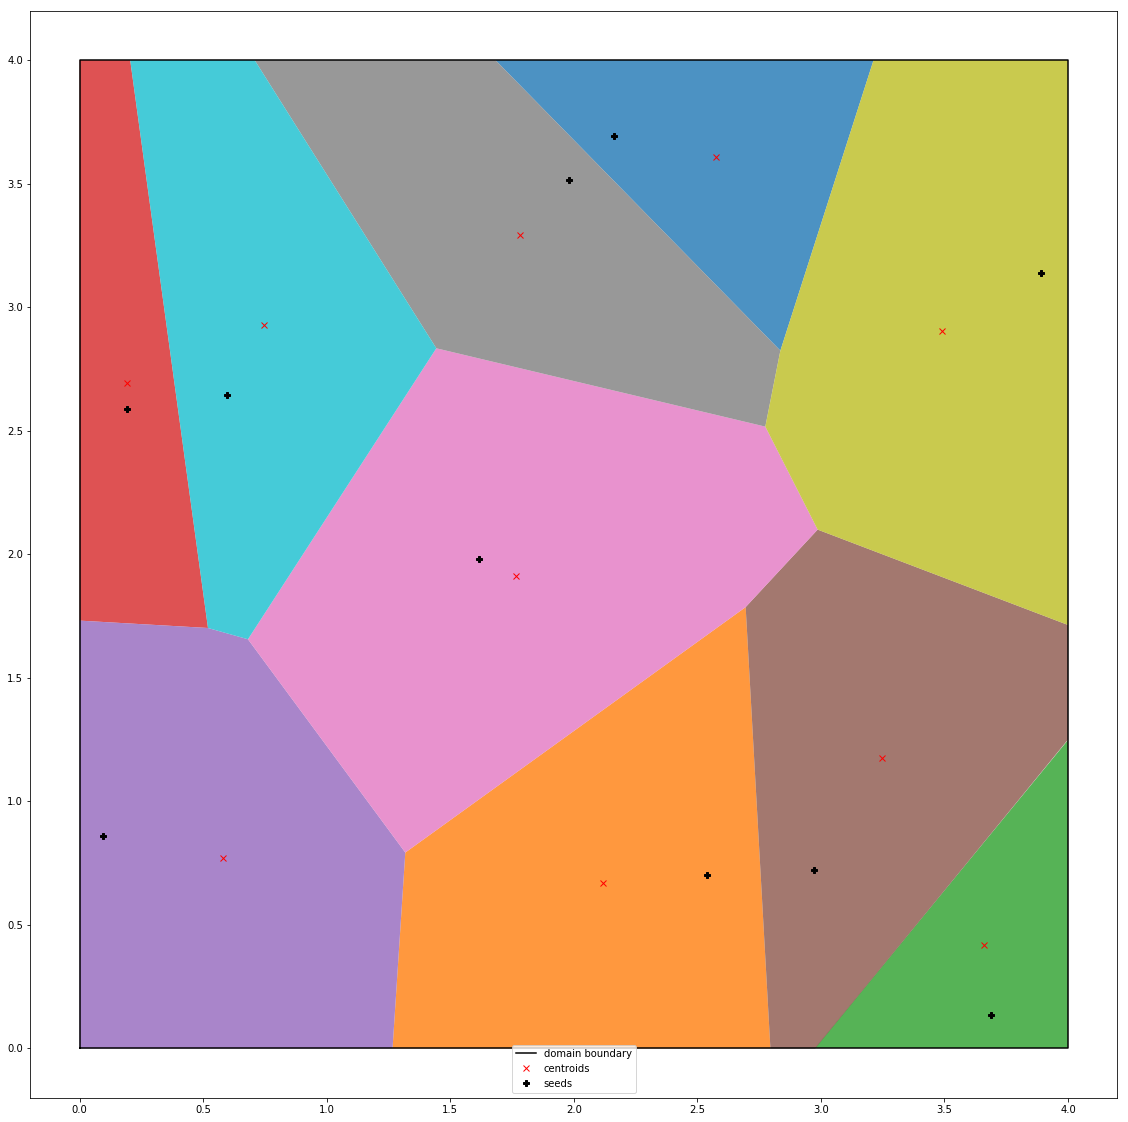

In [2]:
square = np.array([[0,0], [4,0], [4,4], [0,4]])
initial_pts_square = np.random.uniform(0, 4, size = (10, 2))

seeds, regions = voronoi_domain(initial_pts_square, square)
plot_voronoi_domain(seeds, square, regions)

### Lloyd's method

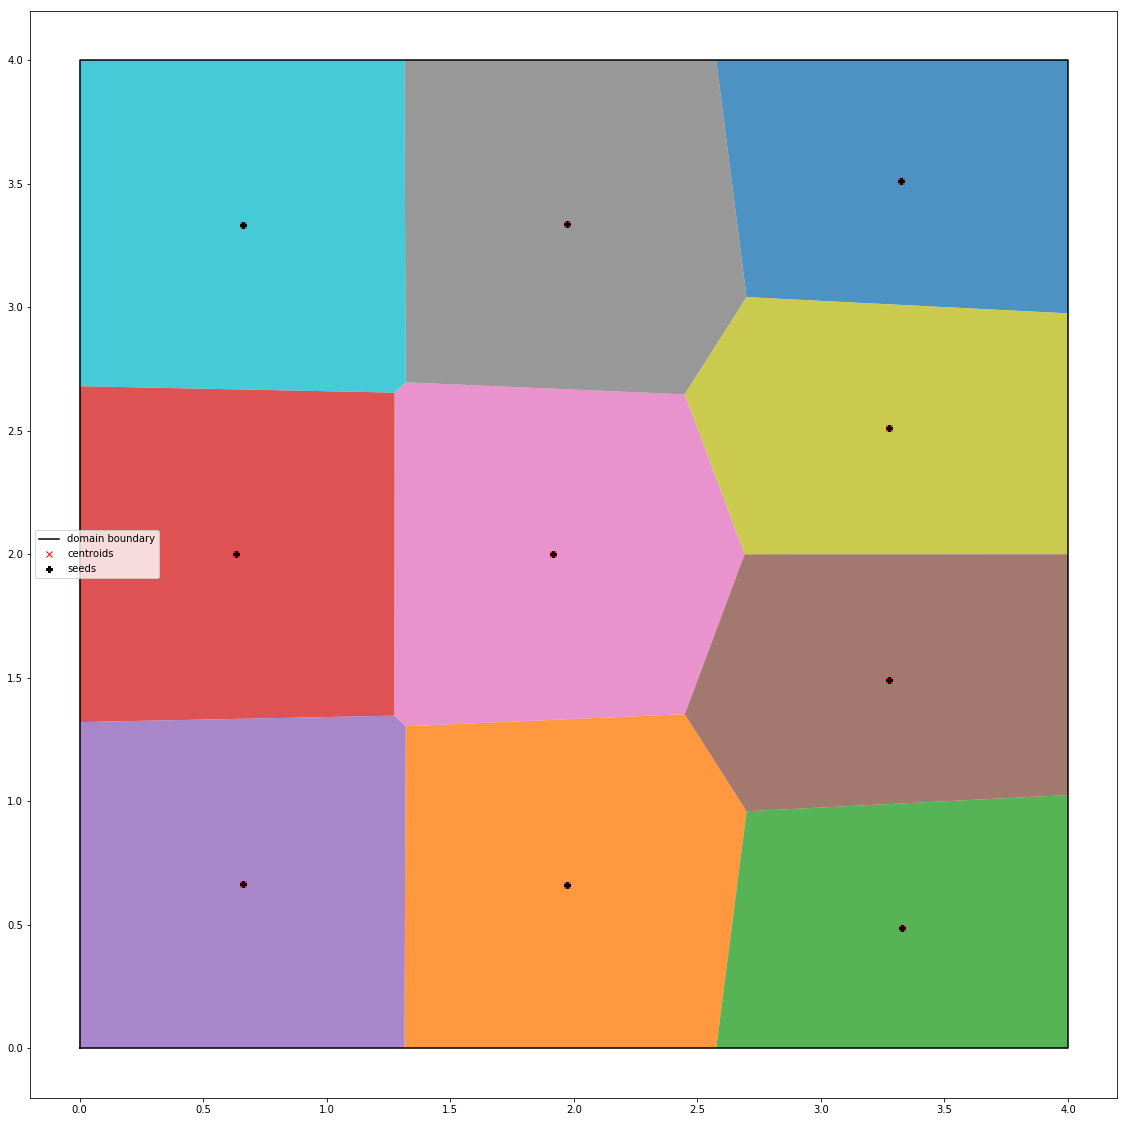

In [3]:
lloyd_seeds_square, lloyd_regions_square = Lloyd(initial_pts_square, square)
plot_voronoi_domain(lloyd_seeds_square, square, lloyd_regions_square)

### BFGS

Success:  True
Number of iterations:  23


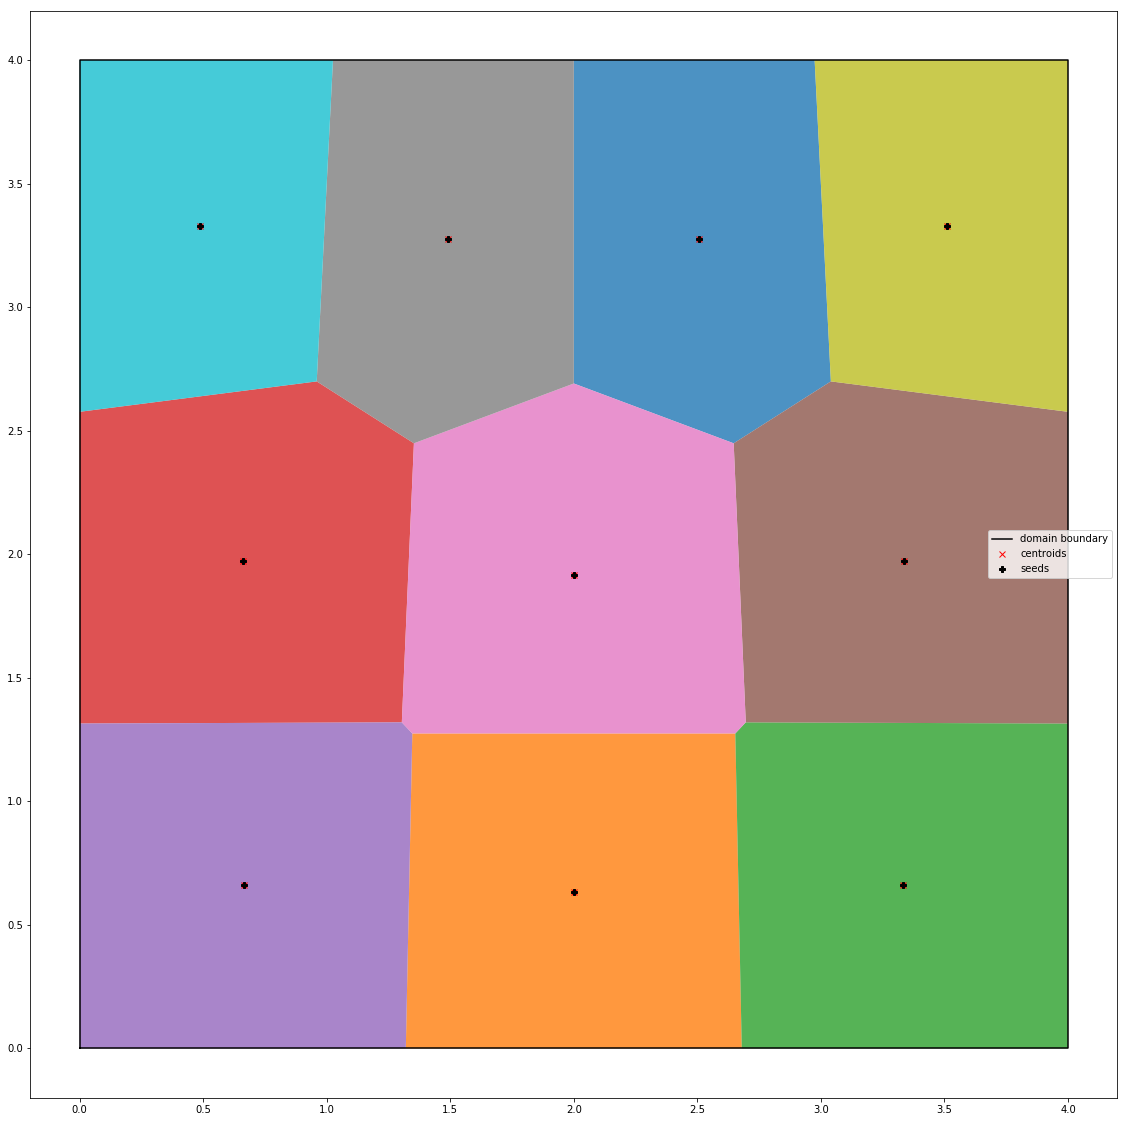

In [4]:
bfgs_square = spopt.minimize(F, initial_pts_square, method = 'BFGS', jac = grad_F, args = (square,))
bfgs_seeds_square, bfgs_regions_square = voronoi_domain(bfgs_square['x'], square)
print('Success: ', bfgs_square['success'])
print('Number of iterations: ', bfgs_square['nit'])
plot_voronoi_domain(bfgs_seeds_square, square, bfgs_regions_square)

### L-BFGS-B

In [ ]:
l_bfgs_b_square = spopt.minimize(F, initial_pts_square, method = 'L-BFGS-B', jac = grad_F, args = (square,))
l_bfgs_b_seeds_square, l_bfgs_b_regions_square = voronoi_domain(l_bfgs_b_square['x'], square)
print('Success: ', l_bfgs_b_square['success'])
print('Number of iterations: ', l_bfgs_b_square['nit'])
plot_voronoi_domain(l_bfgs_b_seeds_square, square, l_bfgs_b_regions_square)

In [ ]:
print("=========== square ==========")
print("---------------- value of the objective function --------------------")
print("Initial fct value: ", F(initial_pts_square, square))
print("Lloyd fct value: ", F(lloyd_seeds_square, square))
print("bfgs fct value: ", F(bfgs_seeds_square, square))
print("l_bfgs_b fct value: ", F(l_bfgs_b_seeds_square, square))
print("---------------- 2-norm of the gradient --------------------")
print("Initial fct gradient: ", np.linalg.norm( grad_F(initial_pts_square, square) ) )
print("Lloyd fct gradient: ", np.linalg.norm( grad_F(lloyd_seeds_square, square)) )
print("bfgs fct gradient: ", np.linalg.norm( grad_F(bfgs_seeds_square, square)) )
print("l_bfgs_b fct gradient: ", np.linalg.norm( grad_F(l_bfgs_b_seeds_square, square)) )

## Hectagon

### Voronoi diagram

In [ ]:
x = 3/np.sqrt(2)
y = 3

hectagon = np.array([[0, y], [x, x], [y, 0], [x, -x], [0, -y], [-x, -x], [-y, 0], [-x, x]])
nb_pts = 9
centroid = list(Polygon(hectagon).centroid.coords)
angles = np.random.uniform(0, 2*np.pi, nb_pts)
radii = np.random.uniform(0, y, nb_pts)

initial_pts_hectagon = centroid + np.array([ [r*np.cos(theta), r*np.sin(theta)] for theta, r in zip(angles, radii) ])

seeds, regions = voronoi_domain(initial_pts_hectagon, hectagon)

plot_voronoi_domain(seeds, hectagon, regions)

### Lloyd's method

In [ ]:
lloyd_seeds_hectagon, lloyd_regions_hectagon = Lloyd(initial_pts_hectagon, hectagon)
plot_voronoi_domain(lloyd_seeds_hectagon, hectagon, lloyd_regions_hectagon)

### BFGS

In [ ]:
bfgs_hectagon = spopt.minimize(F, initial_pts_hectagon, jac = grad_F, method = 'BFGS', args = (hectagon,))
bfgs_seeds_hectagon, bfgs_regions_hectagon = voronoi_domain(bfgs_hectagon['x'], hectagon)
print('Success: ', bfgs_hectagon['success'])
print('Number of iterations: ', bfgs_hectagon['nit'])
plot_voronoi_domain(bfgs_seeds_hectagon, hectagon, bfgs_regions_hectagon)

### L-BFGS-B

In [ ]:
l_bfgs_b_hectagon = spopt.minimize(F, initial_pts_hectagon, jac = grad_F, method = 'L-BFGS-B', args = (hectagon,))
l_bfgs_b_seeds_hectagon, l_bfgs_b_regions_hectagon = voronoi_domain(l_bfgs_b_hectagon['x'], hectagon)
print('Success: ', l_bfgs_b_hectagon['success'])
print('Number of iterations: ', l_bfgs_b_hectagon['nit'])
plot_voronoi_domain(l_bfgs_b_seeds_hectagon, hectagon, l_bfgs_b_regions_hectagon)

In [ ]:
print("=========== hectagon ==========")
print("---------------- value of the objective function --------------------")
print("Initial fct value: ", F(initial_pts_hectagon, hectagon))
print("Lloyd fct value: ", F(lloyd_seeds_hectagon, hectagon))
print("bfgs fct value: ", F(bfgs_seeds_hectagon, hectagon))
print("l_bfgs_b fct value: ", F(l_bfgs_b_seeds_hectagon, hectagon))
print("---------------- 2-norm of the gradient --------------------")
print("Initial fct gradient: ", np.linalg.norm( grad_F(initial_pts_hectagon, hectagon) ) )
print("Lloyd fct gradient: ", np.linalg.norm( grad_F(lloyd_seeds_hectagon, hectagon)) )
print("bfgs fct gradient: ", np.linalg.norm( grad_F(bfgs_seeds_hectagon, hectagon)) )
print("l_bfgs_b fct gradient: ", np.linalg.norm( grad_F(l_bfgs_b_seeds_hectagon, hectagon)) )

## Wavenumbers domain

In [5]:
# Data
x_diffraction_pt = np.array([5000, -3000]) # difraction point, fixed throughout the notebook

start = 0
stop = 10000

c0 = 2*np.pi # velocity of the medium
omega = 1 # it's f_0; is omega = f_0?
k0 = 2*np.pi*omega/c0*c0

# We compute the maximum angle \phi_max that \phi_s and \phi_r can take; will be useful for 
# later angular and circular arcs formulations of the wavenumber components 
s = np.array([start, 0])
ps = x_diffraction_pt - s
ps = ps/np.linalg.norm(ps)
phi_max = np.arccos(np.inner(ps, np.array([0, -1])))

### Building the enveloppe of the domain

In [6]:
Domain = domain_construction( np.array([ - phi_max, phi_max ]), k0)

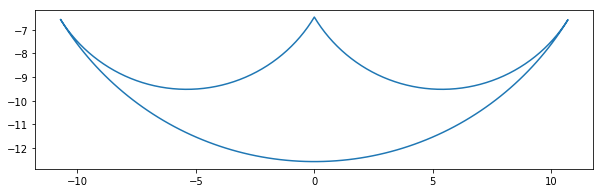

True

In [7]:
# Vizualization of the validity of the polygon
S = Polygon(np.array(Domain))
plt.figure(figsize = (10, 10))
ax = plt.gca()
ax.set_aspect('equal')
ax.plot(*S.exterior.xy)
plt.show()
S.is_valid

### Initialization of the seeds

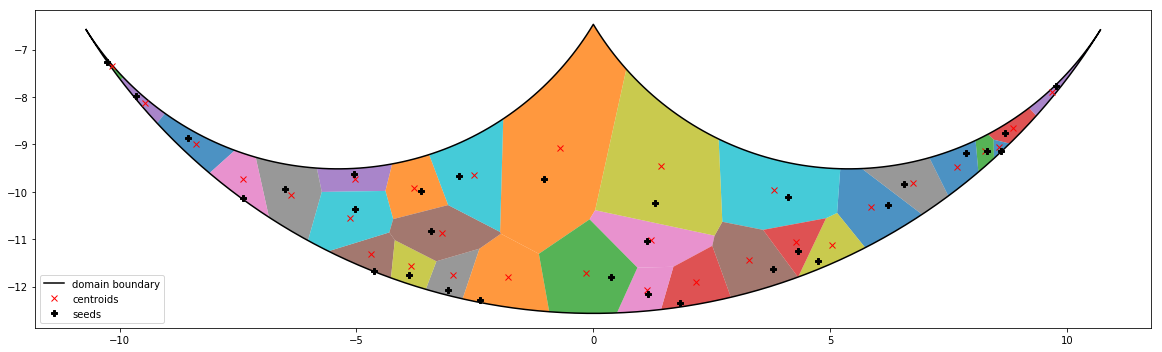

In [11]:
# random seeds
nb_seeds = 31
initial_Phi = np.random.uniform(- phi_max, phi_max, size = (nb_seeds,2))
initial_K = []
for angles in initial_Phi:
    phis = angles[0]
    phir = angles[1]
    k = wavenumber_angular_formula(phis, phir, k0)
    initial_K.append(k)
initial_K = np.array(initial_K).reshape(nb_seeds, 2)

seeds, regions = voronoi_domain(initial_K, Domain)

plot_voronoi_domain(seeds, Domain, regions)

### Lloyd's method

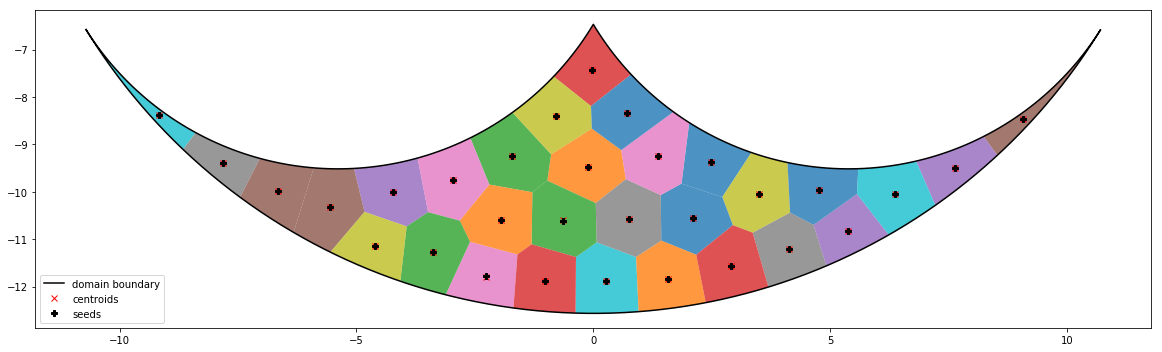

In [9]:
lloyd_seeds, lloyd_regions = Lloyd(initial_K, Domain)
plot_voronoi_domain(lloyd_seeds, Domain, lloyd_regions)

### BFGS

Optimization terminated successfully.
         Current function value: 12.696451
         Iterations: 55
         Function evaluations: 60
         Gradient evaluations: 60
Success:  True
Number of iterations:  55


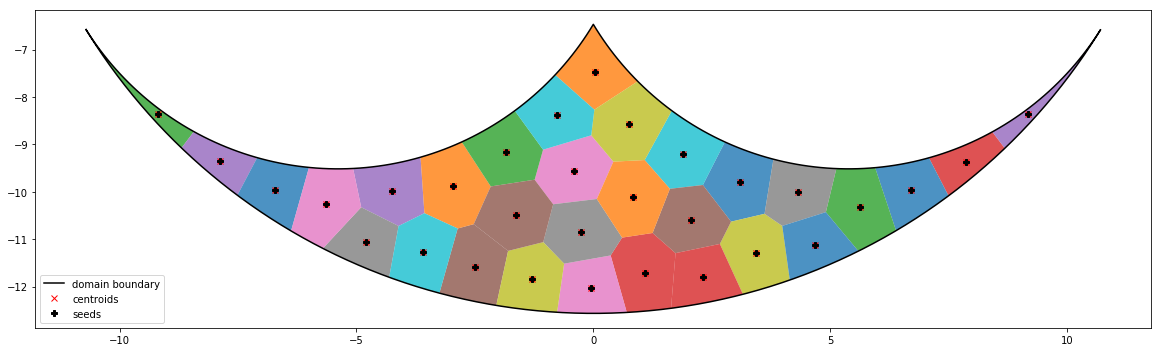

In [12]:
bfgs = spopt.minimize(F, initial_K, method = 'BFGS', jac = grad_F, args = (Domain,), options = {'disp':True})
bfgs_seeds, bfgs_regions = voronoi_domain(bfgs['x'], Domain)
print('Success: ', bfgs['success'])
print('Number of iterations: ', bfgs['nit'])
plot_voronoi_domain(bfgs_seeds, Domain, bfgs_regions)

In [ ]:
bfgs

### L-BFGS-B

In [ ]:
# the method L-BFGS-B tends to produce errors with empty intersections of polygons
l_bfgs_b = spopt.minimize(F, initial_K, method = 'L-BFGS-B', jac = grad_F, args = (Domain,), options = {'disp':True})
l_bfgs_b_seeds, l_bfgs_b_regions = voronoi_domain(l_bfgs_b['x'], Domain)
print('Success: ', l_bfgs_b['success'])
print('Number of iterations: ', l_bfgs_b['nit'])
plot_voronoi_domain(l_bfgs_b_seeds, Domain, l_bfgs_b_regions)

In [ ]:
l_bfgs_b

In [ ]:
print("=========== Wavenumbers Domain ==========")
print("---------------- value of the objective function --------------------")
print("Initial fct value: ", F(initial_K, Domain))
print("Lloyd fct value: ", F(lloyd_seeds, Domain))
print("bfgs fct value: ", F(bfgs_seeds, Domain))
print("l_bfgs_b fct value: ", F(l_bfgs_b_seeds, Domain))
print("---------------- 2-norm of the gradient --------------------")
print("Initial fct gradient: ", np.linalg.norm( grad_F(initial_K, Domain) ) )
print("Lloyd fct gradient: ", np.linalg.norm( grad_F(lloyd_seeds, Domain)) )
print("bfgs fct gradient: ", np.linalg.norm( grad_F(bfgs_seeds, Domain)) )
print("l_bfgs_b fct gradient: ", np.linalg.norm( grad_F(l_bfgs_b_seeds, Domain)) )